In [1]:

import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [13]:
tested_df = pd.read_csv('tested.csv')



In [15]:
print(tested_df.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [16]:
tested_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
tested_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [19]:
tested_df.info()
print('_'*40)
tested_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [20]:
tested_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [21]:
tested_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [23]:
tested_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


In [24]:
tested_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,1.0
1,male,0.0


In [25]:
tested_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
5,5,1.000000
6,8,0.500000
1,1,0.490909
2,2,0.428571
0,0,0.310954
3,3,0.250000
4,4,0.250000


In [26]:
tested_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
4,4,1.000000
3,3,0.666667
2,2,0.606061
1,1,0.538462
7,9,0.500000
0,0,0.305556
5,5,0.000000
6,6,0.000000


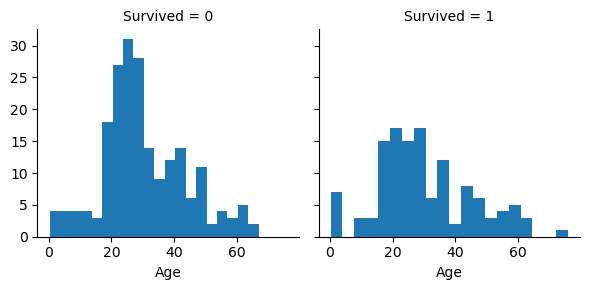

In [27]:
g = sns.FacetGrid(tested_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

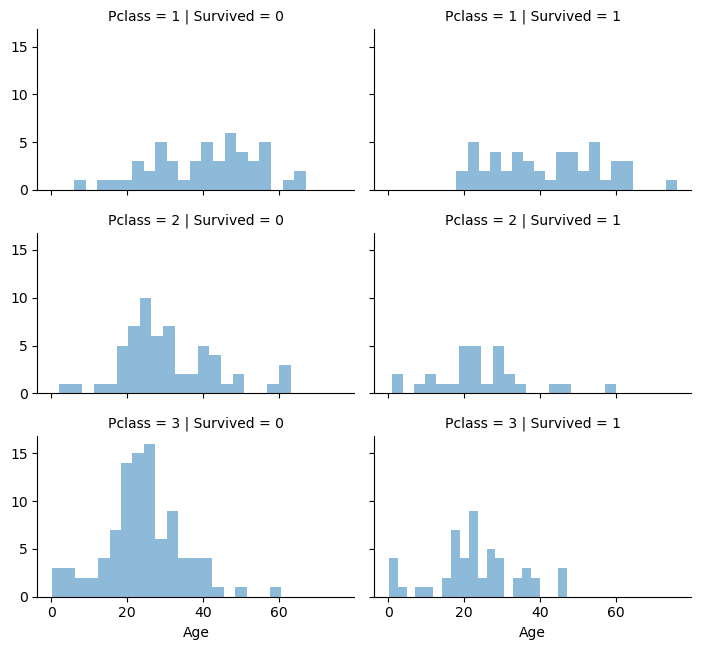

In [29]:
grid = sns.FacetGrid(tested_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

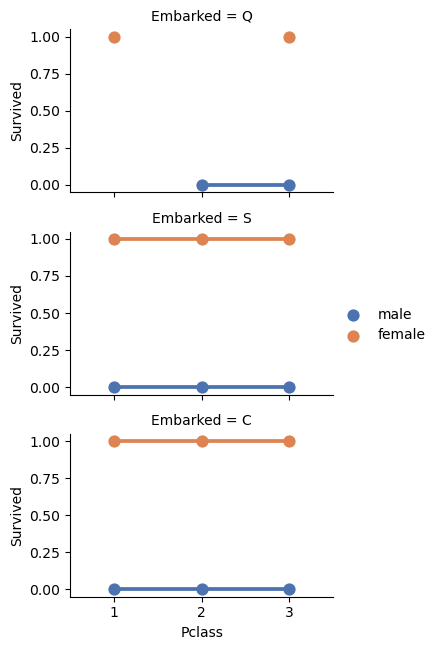

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

grid = sns.FacetGrid(tested_df, row='Embarked', height=2.2, aspect=1.6)

grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=[1, 2, 3], hue_order=['male', 'female'])

grid.add_legend()

plt.show()


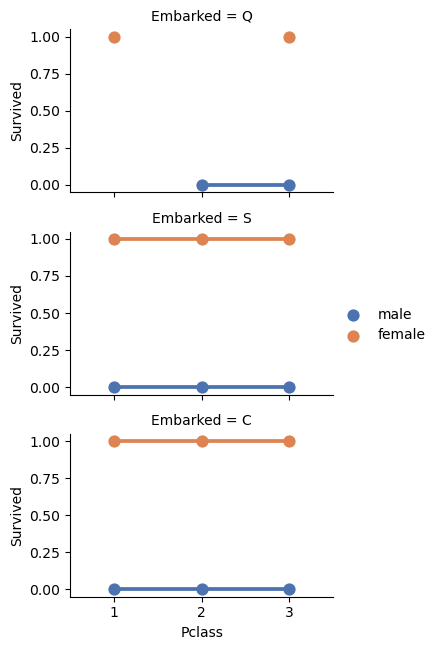

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

grid = sns.FacetGrid(tested_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=[1, 2, 3], hue_order=['male', 'female'])
grid.add_legend()
plt.show()


In [37]:
test_df = tested_df.drop(['Ticket', 'Cabin'], axis=1)

print("After", tested_df.shape)


After (418, 12)


In [39]:
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

title_sex_cross_tab = pd.crosstab(test_df['Title'], test_df['Sex'])

print(title_sex_cross_tab)


Sex     female  male
Title               
Col          0     2
Dona         1     0
Dr           0     1
Master       0    21
Miss        78     0
Mr           0   240
Mrs         72     0
Ms           1     0
Rev          0     2


In [41]:
test_df['Title'] = test_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')

test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')

test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')

title_survival_mean = test_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

print(title_survival_mean)


    Title  Survived
0  Master  0.000000
1    Miss  1.000000
2      Mr  0.000000
3     Mrs  1.000000
4    Rare  0.166667


In [43]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

test_df['Title'] = test_df['Title'].map(title_mapping)

test_df['Title'] = test_df['Title'].fillna(0)

print(test_df.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

      Fare Embarked  Title  
0   7.8292        Q      1  
1   7.0000        S      3  
2   9.6875        Q      1  
3   8.6625        S      1  
4  12.2875        S      3  


In [44]:
test_df = test_df.drop(['Name'], axis=1)

print("Train DataFrame Shape:", train_df.shape)
print("Test DataFrame Shape:", test_df.shape)


Train DataFrame Shape: (700, 2)
Test DataFrame Shape: (418, 10)


In [46]:
test_df['Sex'] = test_df['Sex'].map({'female': 1, 'male': 0}).astype(int)

print(test_df.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  \
0          892         0       3    0  34.5      0      0   7.8292        Q   
1          893         1       3    1  47.0      1      0   7.0000        S   
2          894         0       2    0  62.0      0      0   9.6875        Q   
3          895         0       3    0  27.0      0      0   8.6625        S   
4          896         1       3    1  22.0      1      1  12.2875        S   

   Title  
0      1  
1      3  
2      1  
3      1  
4      3  


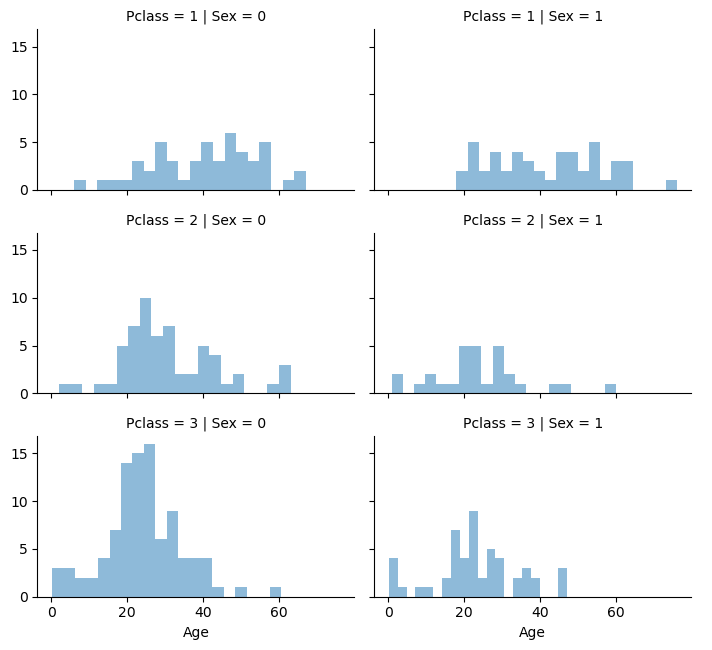

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

grid = sns.FacetGrid(test_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)

grid.map(plt.hist, 'Age', alpha=.5, bins=20)

grid.add_legend()

plt.show()


In [48]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [49]:
guess_ages = np.zeros((2,3))

for i in range(0, 2):
    for j in range(0, 3):
        guess_df = test_df[(test_df['Sex'] == i) & (test_df['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_df.median()
        guess_ages[i,j] = int(age_guess / 0.5 + 0.5) * 0.5
        
for i in range(0, 2):
    for j in range(0, 3):
        test_df.loc[(test_df.Age.isnull()) & (test_df.Sex == i) & (test_df.Pclass == j+1), 'Age'] = guess_ages[i,j]

test_df['Age'] = test_df['Age'].astype(int)

print(test_df.head())


   PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  \
0          892         0       3    0   34      0      0   7.8292        Q   
1          893         1       3    1   47      1      0   7.0000        S   
2          894         0       2    0   62      0      0   9.6875        Q   
3          895         0       3    0   27      0      0   8.6625        S   
4          896         1       3    1   22      1      1  12.2875        S   

   Title  
0      1  
1      3  
2      1  
3      1  
4      3  


In [50]:
import pandas as pd

test_df['AgeBand'] = pd.cut(test_df['Age'], 5)

age_band_survival_mean = test_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

age_band_survival_mean = age_band_survival_mean.sort_values(by='AgeBand', ascending=True)


print(age_band_survival_mean)


          AgeBand  Survived
0  (-0.076, 15.2]  0.406250
1    (15.2, 30.4]  0.355102
2    (30.4, 45.6]  0.337079
3    (45.6, 60.8]  0.428571
4    (60.8, 76.0]  0.400000


In [51]:
test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
test_df.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
test_df.loc[test_df['Age'] > 64, 'Age']

print(test_df.head())


   PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  \
0          892         0       3    0    2      0      0   7.8292        Q   
1          893         1       3    1    2      1      0   7.0000        S   
2          894         0       2    0    3      0      0   9.6875        Q   
3          895         0       3    0    1      0      0   8.6625        S   
4          896         1       3    1    1      1      1  12.2875        S   

   Title       AgeBand  
0      1  (30.4, 45.6]  
1      3  (45.6, 60.8]  
2      1  (60.8, 76.0]  
3      1  (15.2, 30.4]  
4      3  (15.2, 30.4]  


In [52]:
test_df = test_df.drop(['AgeBand'], axis=1)

print(test_df.head())


   PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  \
0          892         0       3    0    2      0      0   7.8292        Q   
1          893         1       3    1    2      1      0   7.0000        S   
2          894         0       2    0    3      0      0   9.6875        Q   
3          895         0       3    0    1      0      0   8.6625        S   
4          896         1       3    1    1      1      1  12.2875        S   

   Title  
0      1  
1      3  
2      1  
3      1  
4      3  


In [53]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

family_size_survival_mean = test_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

family_size_survival_mean = family_size_survival_mean.sort_values(by='Survived', ascending=False)

print(family_size_survival_mean)


   FamilySize  Survived
3           4  0.714286
5           6  0.666667
2           3  0.526316
7           8  0.500000
8          11  0.500000
1           2  0.486486
4           5  0.285714
0           1  0.268775
6           7  0.250000


In [54]:
test_df['IsAlone'] = 0

test_df.loc[test_df['FamilySize'] == 1, 'IsAlone'] = 1

is_alone_survival_mean = test_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

print(is_alone_survival_mean)


   IsAlone  Survived
0        0  0.509091
1        1  0.268775


In [55]:
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

print(test_df.head())


   PassengerId  Survived  Pclass  Sex  Age     Fare Embarked  Title  IsAlone
0          892         0       3    0    2   7.8292        Q      1        1
1          893         1       3    1    2   7.0000        S      3        0
2          894         0       2    0    3   9.6875        Q      1        1
3          895         0       3    0    1   8.6625        S      1        1
4          896         1       3    1    1  12.2875        S      3        0


In [56]:
test_df['Age*Class'] = test_df['Age'] * test_df['Pclass']

print(test_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10))


   Age*Class  Age  Pclass
0          6    2       3
1          6    2       3
2          6    3       2
3          3    1       3
4          3    1       3
5          0    0       3
6          3    1       3
7          2    1       2
8          3    1       3
9          3    1       3


In [58]:
freq_port = test_df['Embarked'].dropna().mode()[0]

print(freq_port)



S


In [60]:
test_df['Embarked'] = test_df['Embarked'].fillna(freq_port)

embarked_survival_mean = test_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

embarked_survival_mean = embarked_survival_mean.sort_values(by='Survived', ascending=False)

print(embarked_survival_mean)


  Embarked  Survived
1        Q  0.521739
0        C  0.392157
2        S  0.325926


In [61]:
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

print(test_df.head())


   PassengerId  Survived  Pclass  Sex  Age     Fare  Embarked  Title  IsAlone  \
0          892         0       3    0    2   7.8292         2      1        1   
1          893         1       3    1    2   7.0000         0      3        0   
2          894         0       2    0    3   9.6875         2      1        1   
3          895         0       3    0    1   8.6625         0      1        1   
4          896         1       3    1    1  12.2875         0      3        0   

   Age*Class  
0          6  
1          6  
2          6  
3          3  
4          3  


In [62]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

print(test_df.head())


   PassengerId  Survived  Pclass  Sex  Age     Fare  Embarked  Title  IsAlone  \
0          892         0       3    0    2   7.8292         2      1        1   
1          893         1       3    1    2   7.0000         0      3        0   
2          894         0       2    0    3   9.6875         2      1        1   
3          895         0       3    0    1   8.6625         0      1        1   
4          896         1       3    1    1  12.2875         0      3        0   

   Age*Class  
0          6  
1          6  
2          6  
3          3  
4          3  


In [63]:
import pandas as pd

test_df['FareBand'] = pd.qcut(test_df['Fare'], 4)

fare_band_survival_mean = test_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()

fare_band_survival_mean = fare_band_survival_mean.sort_values(by='FareBand', ascending=True)

print(fare_band_survival_mean)


            FareBand  Survived
0    (-0.001, 7.896]  0.263158
1    (7.896, 14.454]  0.268041
2   (14.454, 31.472]  0.401961
3  (31.472, 512.329]  0.523810


In [64]:
test_df.loc[test_df['Fare'] <= 7.91, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'Fare'] = 2
test_df.loc[test_df['Fare'] > 31, 'Fare'] = 3

test_df['Fare'] = test_df['Fare'].astype(int)

test_df = test_df.drop(['FareBand'], axis=1)

print(test_df.head(10))


   PassengerId  Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone  \
0          892         0       3    0    2     0         2      1        1   
1          893         1       3    1    2     0         0      3        0   
2          894         0       2    0    3     1         2      1        1   
3          895         0       3    0    1     1         0      1        1   
4          896         1       3    1    1     1         0      3        0   
5          897         0       3    0    0     1         0      1        1   
6          898         1       3    1    1     0         2      2        1   
7          899         0       2    0    1     2         0      1        0   
8          900         1       3    1    1     0         1      3        1   
9          901         0       3    0    1     2         0      1        0   

   Age*Class  
0          6  
1          6  
2          6  
3          3  
4          3  
5          0  
6          3  
7          2  
8     

In [65]:
tested_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [66]:
X_train = test_df.drop("PassengerId", axis=1).copy()

print("X_train shape:", X_train.shape)


X_train shape: (418, 9)
